## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
dataset = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv")
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_context("paper",  font_scale=1.2)
dataset.info()
print("\n","Розмірність датасету:", dataset.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Розмірність датасету: (891, 12)


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [3]:
print(dataset.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Ваші висновки: У датасеті найбільше пропущено в колонці Cabin, потім - Age i Embarked.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



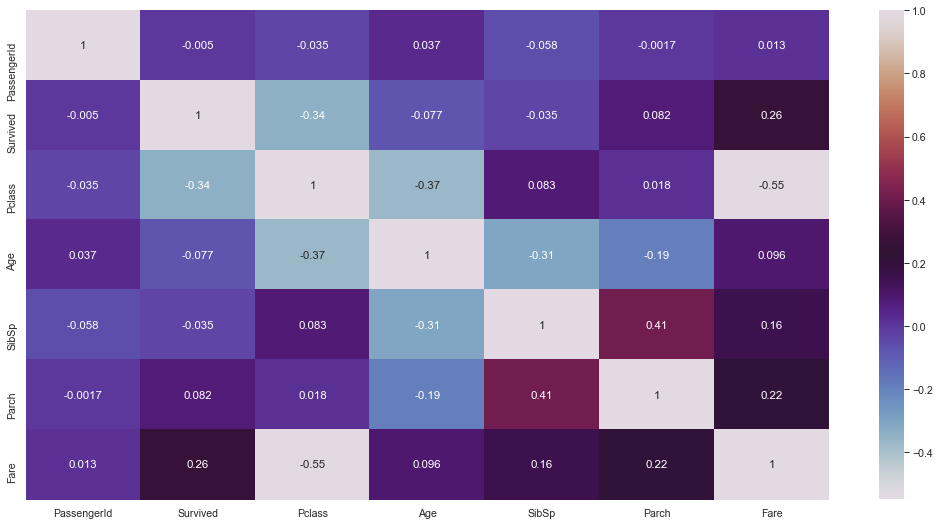

In [4]:
coef = dataset.corr(method = "pearson")
plt.rcParams["figure.figsize"] = (18,9)
sns.heatmap(coef, cmap = "twilight", annot = True)
plt.show()

Ваші висновки: найбільший коефіцієнт кореляції - 0.41(SibSp - Parch, збільшення однієї змінної пов'язане зі збільшенням іншої), а найменший -0.55(Pclass - Fare, збільшення однієї змінної пов'язане зі зменшенням іншої)

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [5]:
def fill_empty(dataframe, group_column):
    mid_age = dataframe[group_column].median()
    return dataframe[group_column].fillna(mid_age)

dataset["Age"] = fill_empty(dataset, "Age")
print(dataset["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


Ваші висновки: Незаповнені дані заповнилися медіанними даними. Приклад - заповнення пропусків в колонці "Age"

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





<AxesSubplot:xlabel='Age_bin', ylabel='count'>

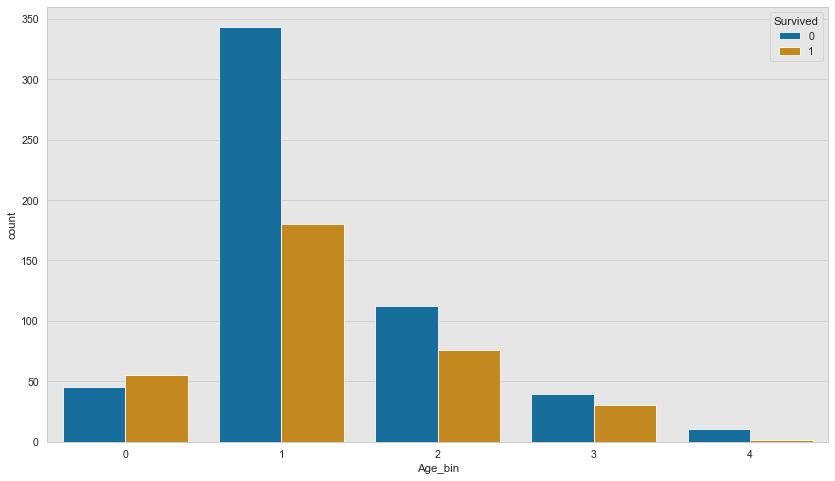

In [17]:
age_category = pd.cut(dataset["Age"], 5, labels=["0", "1", "2", "3", "4"])
dataset["Age_bin"] = age_category

plt.rcParams["figure.figsize"] = (14,8)
sns.countplot(x = "Age_bin", hue="Survived", data=dataset, palette = "colorblind")

Ваші висновки: Як ми бачимо, найбільше вижило людей в 1 групі, потім 2, потім 0, потім 3 і 4.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

In [7]:
dataset['Fare_Range'] = pd.qcut(dataset['Fare'],4)
dataset.groupby(['Fare_Range'])['Survived'].count().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",223
"(7.91, 14.454]",224
"(14.454, 31.0]",222
"(31.0, 512.329]",222


Ваші висновки: В цілому ціна не дуже скачить, хіба для найвищого класу вона, відповідно найвища. Значення в виживших приблизно однакове, а отже кодування використовуувати не доцільно.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

<AxesSubplot:xlabel='Alone', ylabel='Survived'>

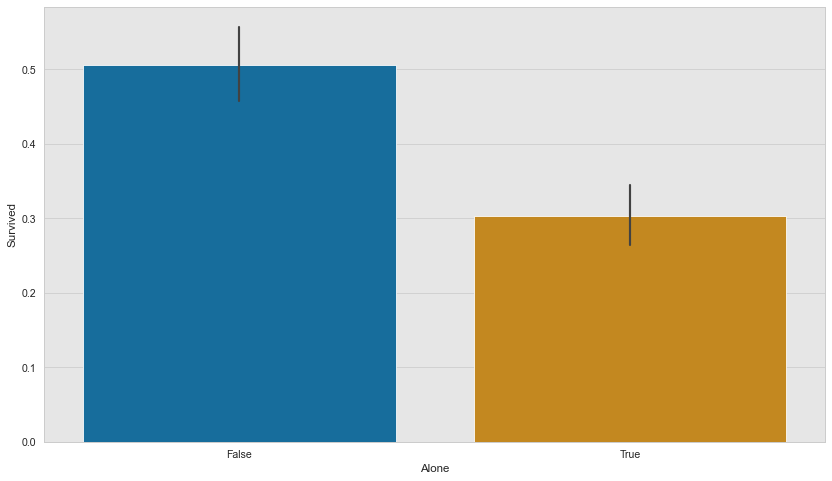

In [8]:
data_quantity_of_fam = dataset
Family_size = data_quantity_of_fam["SibSp"] + data_quantity_of_fam["Parch"]
data_quantity_of_fam.insert(9, "Family_size", Family_size)

Alone = True*(np.array(data_quantity_of_fam.Family_size)==0)
data_quantity_of_fam.insert(10, "Alone", Alone)

plt.rcParams["figure.figsize"] = (14,8)
sns.barplot(x = data_quantity_of_fam["Alone"], y = data_quantity_of_fam["Survived"], palette = "colorblind")

Ваші висновки: Як ми бачимо, не одиноких людей вижило більше ніж одиноких.

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [9]:
dataset.drop(["Cabin", "Ticket"], axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Family_size,Alone,Fare,Embarked,Age_bin,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,False,7.2500,S,1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,1,False,71.2833,C,2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,True,7.9250,S,1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,False,53.1000,S,2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0,True,8.0500,S,2,"(7.91, 14.454]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,0,True,13.0000,S,1,"(7.91, 14.454]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,0,True,30.0000,S,1,"(14.454, 31.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,3,False,23.4500,S,1,"(14.454, 31.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,0,True,30.0000,C,1,"(14.454, 31.0]"


Ваші висновки: В колонці Cabin доволі багато пропущених значень. Я видалив ці дві колонки, бо, по суті, ніякої користі і інформативності вони нам не несуть.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [10]:
dataset["Sex"].replace(to_replace = ["female", "male"], value = [0, 1], inplace = True)
dataset["Embarked"].replace(to_replace = ["S", "C", "Q"], value = [0, 1, 2], inplace = True)
print("Sex's column type:", dataset["Sex"].dtypes)
print("Embarked's column type:", dataset["Embarked"].dtypes)

Sex's column type: int64
Embarked's column type: float64


Ваші висновки: перетворив змінні в числові значення.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



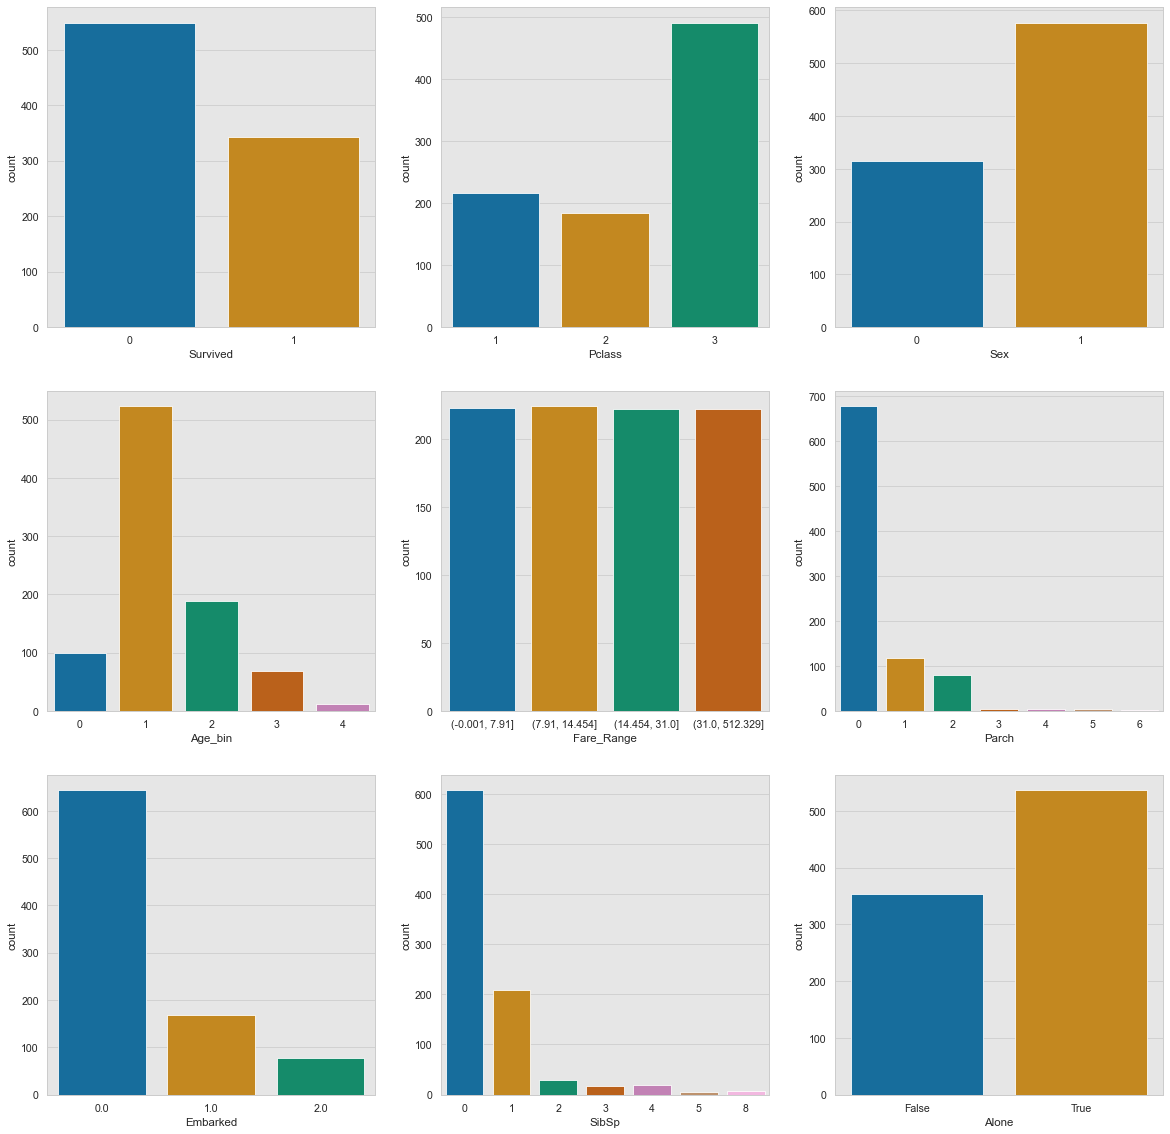

In [11]:
f,ax = plt.subplots(3, 3, figsize=(20,20))
data_categorical = dataset[['Survived', 'Pclass', 'Sex', 'Age_bin', 'Fare_Range','Parch', 'Embarked', 'SibSp', 'Alone']]
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x = variable, data = dataset, ax = subplot, palette = "colorblind")

Ваші висновки:
- померло людей більше, ніж вижило;
- людей в 3 класі було найбільше;
- чоловіків було більше, ніж жінок;
- найбільше вижило в 1 групі;
- кількість людей які заплатили за квиток в різних цінових категоріях рівна;
- найбільше людей було без сім'ї;
- найбільше людей сіло в 0 точці;
- найбільше людей було без сім'ї на кораблі;
- більше одиноких чим неодиноких;

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

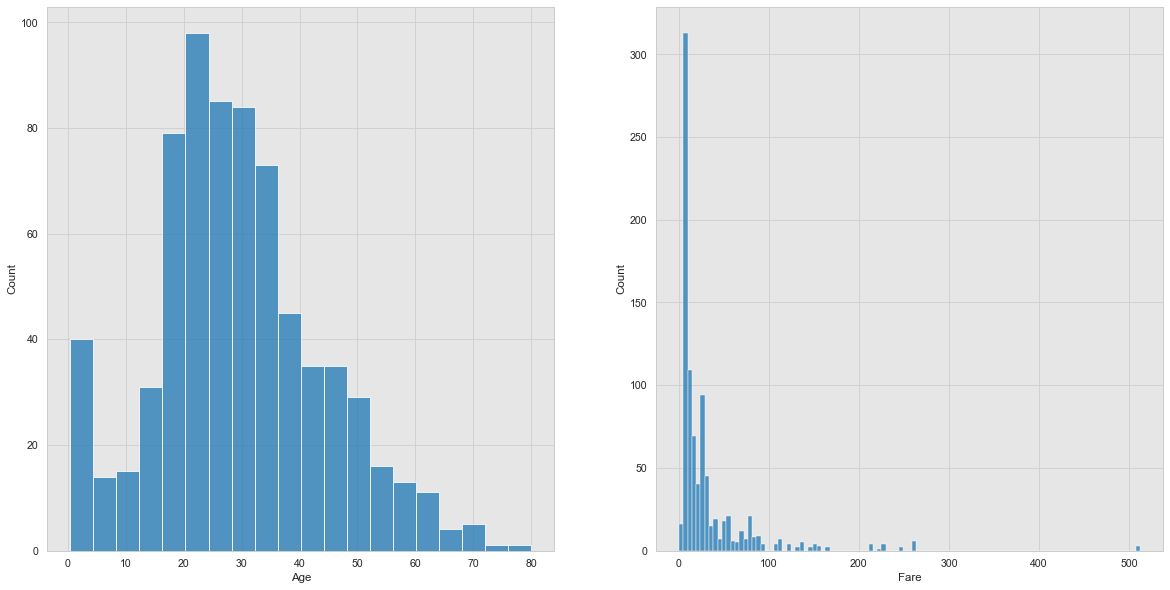

In [12]:
data_numerical = pd.read_csv("https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv", usecols=['Age', 'Fare'])
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x = variable, data = data_numerical, ax = subplot, palette = "colorblind")

Ваші висновки: реальних числових змінних тільки дві - вік і ціна квитка.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

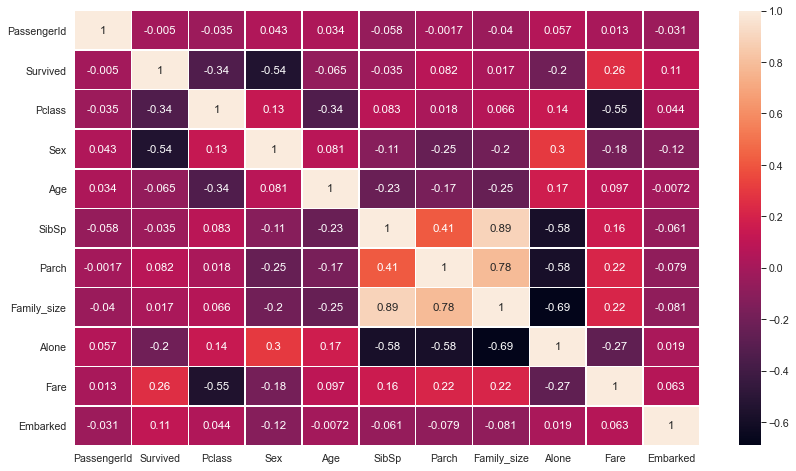

In [23]:
sns.heatmap(dataset.corr(method='pearson'), annot=True, linewidths=.5)
plt.show()

Ваші висновки: Найбільші значення - 0.89(Family_size - SibSp), 0.78(Family_size - Parch), а найменші - -0.69(Alone - Family_size) -0.58(Alone - Parch - SibSp), тобто, випливає, що на розмір сім'ї набільше впливають брати та сестри, а найменше розмір сім'ї та чи людина сама.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.